Data Analysis on Udemy Course Dataset

Importing Libraries & Loading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [171]:
df = pd.read_csv('./udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Basic Exploration

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Checking Null Values

In [5]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Dropping Unnecessary Columns

In [172]:
df.drop(labels=['course_id', 'url'], axis=1, inplace=True)

df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Getting Date from the published timestamp column

In [173]:
df['published_timestamp'] = df['published_timestamp'].apply(lambda x: x.split("T")[0])
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13,Business Finance


Converting published timestamp to datetime type

In [174]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])


In [9]:
df['published_timestamp'].dtype

dtype('<M8[ns]')

Creating Features

In [175]:
#developing a calculated column "Gross Earnings" based on total subscribers * price
df['gross_earnings'] = df['price'] * df['num_subscribers'] 
df.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance,429400
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance,209400
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance,97830


In [177]:
#getting month from published_date

df['month'] = df['published_timestamp'].dt.month
df.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance,429400,1
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance,209400,3
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance,97830,12


In [178]:
#getting year from published_timestamp column
df['year'] = df['published_timestamp'].dt.year
df.head(2) 

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance,429400,1,2017
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance,209400,3,2017


Checking for correlations in dataset

Text(0.5, 1.0, 'Correlation in the dataset')

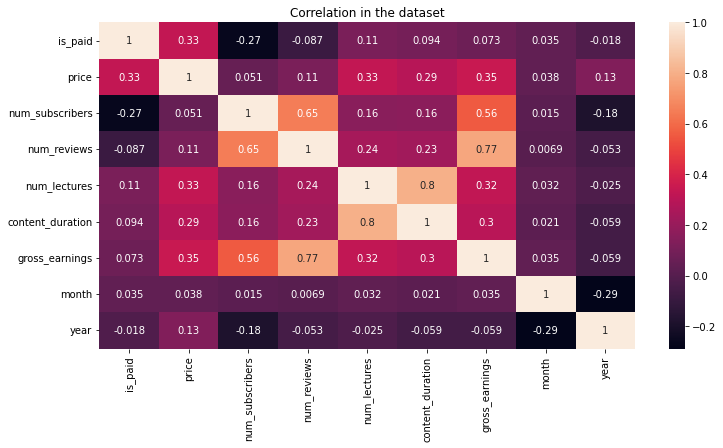

In [161]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation in the dataset")

Analysis

Pie chart on number of paid and free courses

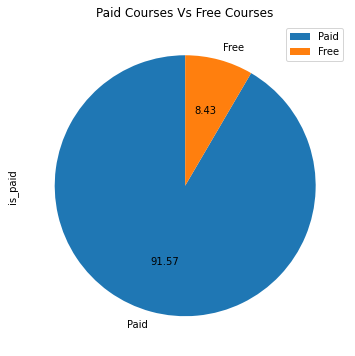

In [14]:

df['is_paid'].value_counts().plot(kind='pie', startangle=90, autopct='%1.2f', labels=['Paid', 'Free'], figsize=(12,6))
plt.title("Paid Courses Vs Free Courses")
plt.legend()

Course Development Over The Years

Text(0.5, 1.0, 'Course Development Over The Years')

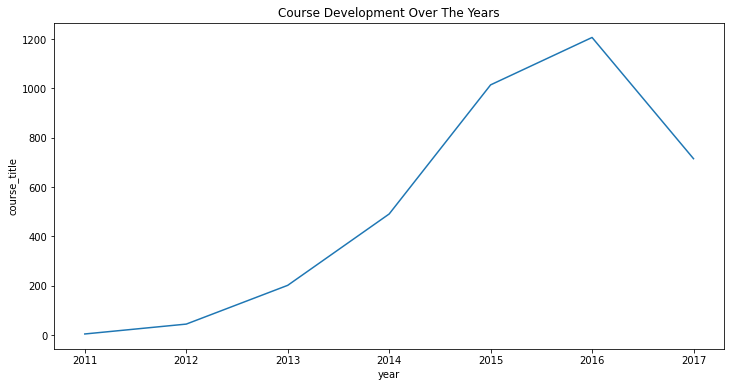

In [15]:
groupedYear = df.groupby(by='year').count()['course_title'].reset_index()
groupedYear.head()

plt.figure(figsize=(12,6))
sns.lineplot(data=groupedYear, x='year', y='course_title')
plt.title("Course Development Over The Years")

Trend of Free Courses Over The Years

Text(0.5, 1.0, 'Trend of Free Courses Over The Years')

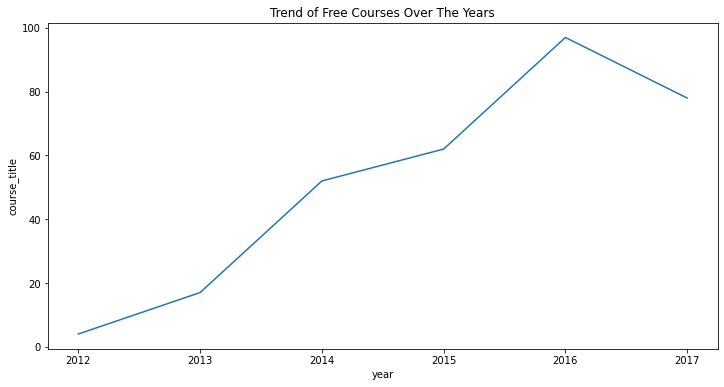

In [16]:
freeDf = df[df['is_paid'] == False]

groupedFree = freeDf.groupby(by='year').count()['course_title'].reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=groupedFree, x='year', y='course_title')
plt.title("Trend of Free Courses Over The Years")

Trend of Paid Courses Over The Year

Text(0.5, 1.0, 'Trend of Paid Courses Over The Years')

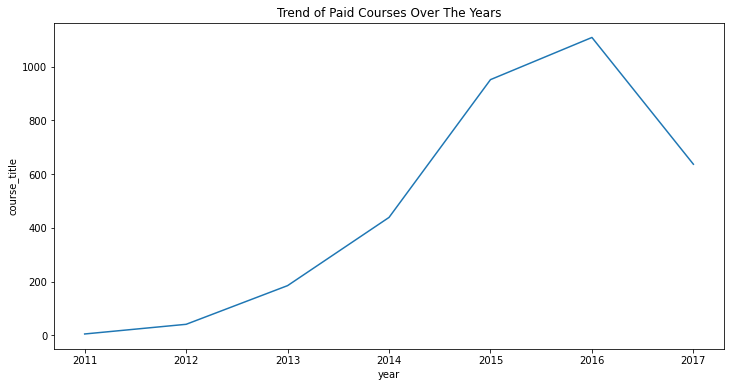

In [17]:
freeDf = df[df['is_paid'] == True]

groupedPaid = freeDf.groupby(by='year').count()['course_title'].reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=groupedPaid, x='year', y='course_title')
plt.title("Trend of Paid Courses Over The Years")

Courses By Levels

C:\Users\1992729\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of courses')

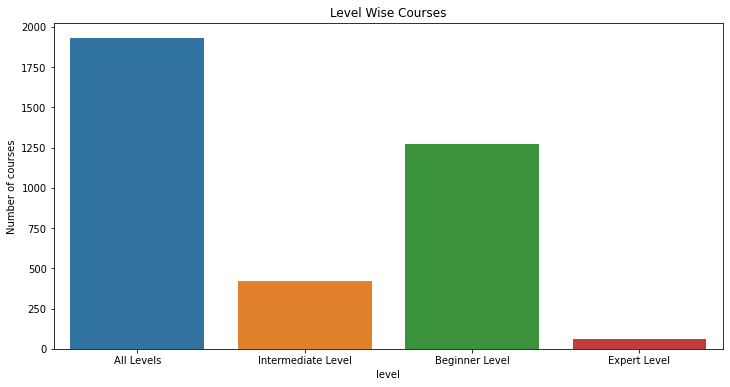

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(df['level'])
plt.title("Level Wise Courses")
plt.ylabel("Number of courses")

Courses By Category

C:\Users\1992729\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of courses')

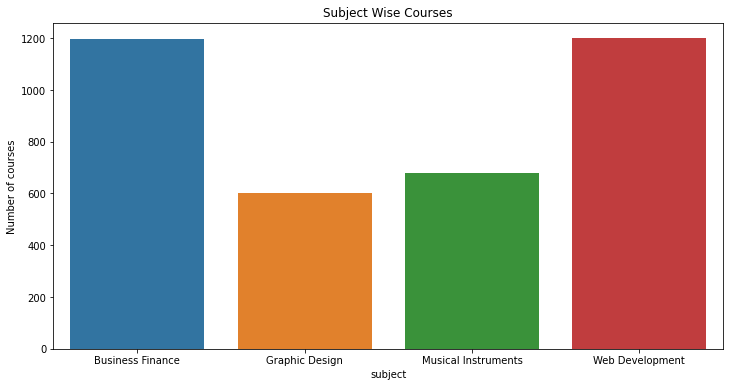

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(df['subject'])
plt.title("Subject Wise Courses")
plt.ylabel("Number of courses")

Pie chart on subject counts

Text(0.5, 1.0, 'Subject Distribution In Dataset')

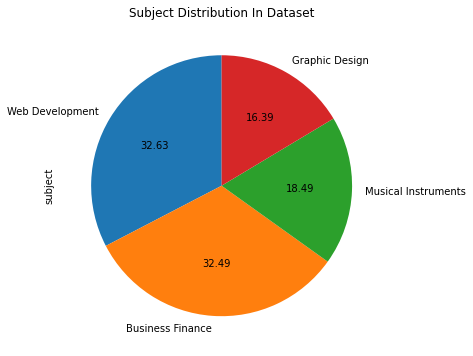

In [20]:
plt.figure(figsize=(12,6))
df['subject'].value_counts().plot(kind='pie', startangle=90, autopct='%1.2f')
plt.title("Subject Distribution In Dataset")

Courses By Year

C:\Users\1992729\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Courses')

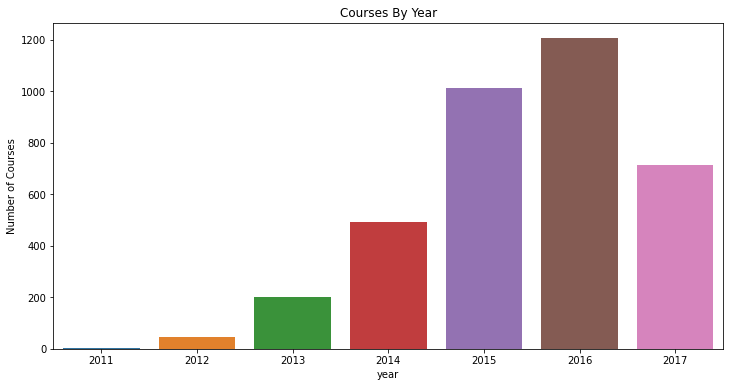

In [21]:

plt.figure(figsize=(12,6))
sns.countplot(df['year'])
plt.title('Courses By Year')
plt.ylabel('Number of Courses')

In [85]:
df['year'].value_counts()

2016    1206
2015    1014
2017     715
2014     491
2013     202
2012      45
2011       5
Name: year, dtype: int64

Trend of Course Development By Month

Text(0.5, 1.0, 'Trend of course development by month')

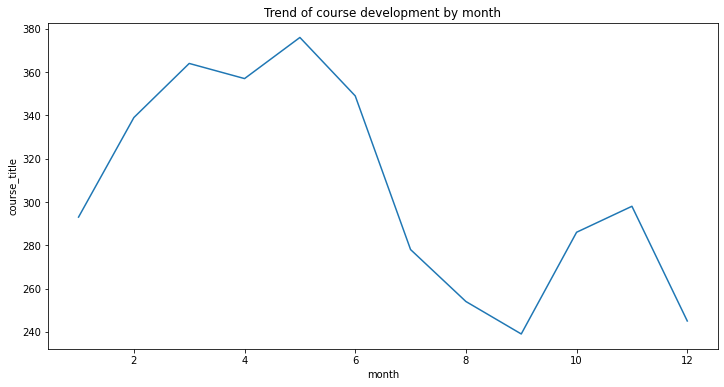

In [22]:
groupedMonth = df.groupby(by='month').count().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=groupedMonth, x='month', y='course_title')
plt.title('Trend of course development by month')

Analysis on Business Finance Courses

Top 5 Course In Business and Finance Based On Subscriber Count

In [23]:
df[(df['subject'] == "Business Finance")].sort_values(by='num_subscribers', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
492,Bitcoin or How I Learned to Stop Worrying and ...,False,0,65576,936,24,All Levels,8.0,2013-04-20,Business Finance,0,4,2013
143,Accounting in 60 Minutes - A Brief Introduction,False,0,56659,4397,16,Beginner Level,1.5,2013-04-07,Business Finance,0,4,2013
103,Stock Market Investing for Beginners,False,0,50855,2698,15,Beginner Level,1.5,2013-12-25,Business Finance,0,12,2013
119,Introduction to Financial Modeling,False,0,29167,1463,8,Intermediate Level,1.5,2014-05-27,Business Finance,0,5,2014
40,The Complete Financial Analyst Course 2017,True,195,24481,2347,174,All Levels,10.0,2016-01-21,Business Finance,4773795,1,2016


Most Reviewed Business Finance Course

In [24]:
df[(df['subject'] == "Business Finance")].sort_values(by='num_reviews', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
143,Accounting in 60 Minutes - A Brief Introduction,False,0,56659,4397,16,Beginner Level,1.5,2013-04-07,Business Finance,0,4,2013
103,Stock Market Investing for Beginners,False,0,50855,2698,15,Beginner Level,1.5,2013-12-25,Business Finance,0,12,2013
38,Beginner to Pro in Excel: Financial Modeling a...,True,195,22257,2697,138,All Levels,7.5,2014-11-25,Business Finance,4340115,11,2014
36,Forex Trading A-Z™ - With LIVE Examples of For...,True,195,16900,2476,52,Beginner Level,5.5,2014-12-12,Business Finance,3295500,12,2014
40,The Complete Financial Analyst Course 2017,True,195,24481,2347,174,All Levels,10.0,2016-01-21,Business Finance,4773795,1,2016


Longest Business Finance Courses

In [25]:
df[(df['subject'] == "Business Finance")].sort_values(by='content_duration', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
561,Financial Management - A Complete Study,True,190,1941,128,527,All Levels,71.5,2014-12-22,Business Finance,368790,12,2014
874,TRADER BOT: Introdução à Linguagem MQL5,True,20,209,33,33,All Levels,70.0,2014-03-07,Business Finance,4180,3,2014
114,Advanced Accounting A Complete Study for CA / ...,True,150,1535,16,462,All Levels,62.0,2016-06-03,Business Finance,230250,6,2016
590,Financial Risk Manager (FRM) Certification: Le...,True,50,86,7,87,All Levels,47.0,2013-07-24,Business Finance,4300,7,2013
160,Learn to Trade The News,True,200,1924,351,544,All Levels,46.5,2015-07-16,Business Finance,384800,7,2015


Costliest Business Finance Courses

In [26]:
df[(df['subject'] == "Business Finance")].sort_values(by='price', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.500000,2017-01-18,Business Finance,429400,1,2017
190,Investing: How I Consistently Beat The Stock M...,True,200,2000,31,34,All Levels,4.500000,2014-12-11,Business Finance,400000,12,2014
147,Python Algo Trading: FX Trading with Oanda,True,200,453,42,33,Intermediate Level,3.000000,2017-03-14,Business Finance,90600,3,2017
568,Successful Day Trading with Fibonacci,True,200,869,135,11,All Levels,2.000000,2015-08-31,Business Finance,173800,8,2015
538,Intro to Impact Investing,True,200,44,4,12,Beginner Level,0.533333,2016-11-08,Business Finance,8800,11,2016


Best Beginner Level Business Finance Courses

In [27]:
df[(df['subject'] == "Business Finance") & (df['level'] == 'Beginner Level')].sort_values(by='num_subscribers', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
143,Accounting in 60 Minutes - A Brief Introduction,False,0,56659,4397,16,Beginner Level,1.5,2013-04-07,Business Finance,0,4,2013
103,Stock Market Investing for Beginners,False,0,50855,2698,15,Beginner Level,1.5,2013-12-25,Business Finance,0,12,2013
494,Forex Basics,False,0,22344,712,26,Beginner Level,3.5,2013-10-16,Business Finance,0,10,2013
112,Stock Market Foundations,False,0,19339,794,9,Beginner Level,2.0,2014-03-31,Business Finance,0,3,2014
374,Financial Accounting - A Brief Introduction,False,0,17847,1440,17,Beginner Level,1.0,2016-02-24,Business Finance,0,2,2016


Best Intermediate Level Business Finance Courses

In [28]:
df[(df['subject'] == "Business Finance") & (df['level'] == 'Intermediate Level')].sort_values(by='num_subscribers', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
119,Introduction to Financial Modeling,False,0,29167,1463,8,Intermediate Level,1.5,2014-05-27,Business Finance,0,5,2014
35,Options Trading Stocks: Proven Toolbox For Fin...,True,195,7884,118,68,Intermediate Level,10.0,2015-05-19,Business Finance,1537380,5,2015
43,Options Trading - How to Win with Weekly Options,True,115,7489,1190,25,Intermediate Level,1.0,2015-10-22,Business Finance,861235,10,2015
206,Binary Options Course - Level 2,False,0,5874,207,9,Intermediate Level,2.0,2014-06-26,Business Finance,0,6,2014
830,Learn to Trade Forex Naked Price Action Big Sh...,False,0,5407,192,11,Intermediate Level,1.0,2016-01-25,Business Finance,0,1,2016


Latest Courses in Business Finance (sorted by subscribers)

In [29]:
df[(df['subject'] == "Business Finance")].sort_values(by=['published_timestamp', 'num_subscribers'], ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
1108,Condor Broken Wing Butterfly Options Trading C...,False,0,16,0,15,All Levels,1.5,2017-07-06,Business Finance,0,7,2017
455,Cryptocurrency (BTC & ETH) Investment & Tradin...,True,20,0,0,7,Beginner Level,2.5,2017-07-06,Business Finance,0,7,2017
462,Forex how traders beat the markest with little...,True,100,0,0,16,All Levels,1.0,2017-07-06,Business Finance,0,7,2017
638,Bitcoin & Ethereum Course (2 Course Bundle),True,200,1,0,52,All Levels,2.5,2017-07-05,Business Finance,200,7,2017
461,Options Trading Foundation: Your journey to co...,True,95,0,0,5,Intermediate Level,1.0,2017-07-05,Business Finance,0,7,2017


Trend of business finance courses

Text(0.5, 1.0, 'Trend of Business Finance course development by Year')

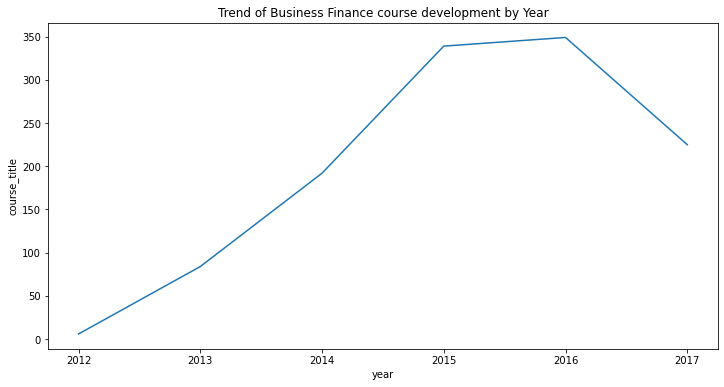

In [30]:
busDf = df[df['subject'] == "Business Finance"]
groupedBsDf = busDf.groupby(by='year').count().reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=groupedBsDf, x='year', y='course_title')
plt.title('Trend of Business Finance course development by Year')

Trend Of Business Finance Course Subscribers

Text(0.5, 1.0, 'Trend of Business Finance course Subscribers by Year')

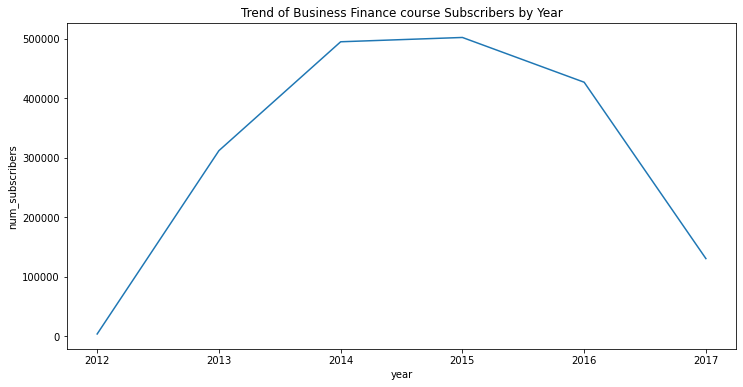

In [31]:
groupedBsDfSub = busDf.groupby(by='year').sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=groupedBsDfSub, x='year', y='num_subscribers')
plt.title('Trend of Business Finance course Subscribers by Year')

In [87]:
groupedBsDfSub.head(7)

,year,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,gross_earnings,month
0,2012,6,255,3620,418,159,26.000000,190740,57
1,2013,77,3825,311664,12753,2048,368.633333,7298950,548
2,2014,170,10205,494623,21634,7014,924.766667,35870820,1381
3,2015,326,23100,501858,16053,11933,1128.900000,38702015,2216
4,2016,315,25450,426647,20326,11490,1100.183333,30727750,2146
5,2017,205,19085,130299,4718,6111,697.350000,10945040,905


Trend of Business Finance Course Earnings

Text(0.5, 1.0, 'Trend of Business Finance course earnings by Year')

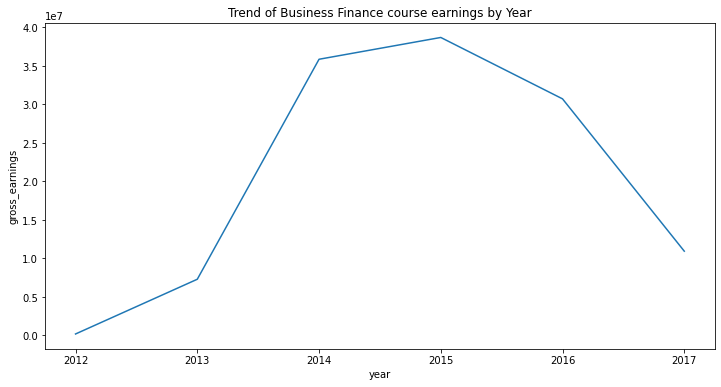

In [32]:
groupedBsDfSub = busDf.groupby(by='year').sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=groupedBsDfSub, x='year', y='gross_earnings')
plt.title('Trend of Business Finance course earnings by Year')

In [33]:
groupedBsDfSub.head(7)

,year,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,gross_earnings,month
0,2012,6,255,3620,418,159,26.000000,190740,57
1,2013,77,3825,311664,12753,2048,368.633333,7298950,548
2,2014,170,10205,494623,21634,7014,924.766667,35870820,1381
3,2015,326,23100,501858,16053,11933,1128.900000,38702015,2216
4,2016,315,25450,426647,20326,11490,1100.183333,30727750,2146
5,2017,205,19085,130299,4718,6111,697.350000,10945040,905


Analysis On Graphic Designing Category

Top 5 Graphic Design Courses

In [34]:
df[(df['subject'] == "Graphic Design")].sort_values(by='num_subscribers', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
1461,Photoshop In-Depth: Master all of Photoshop's ...,False,0,53851,1779,45,All Levels,4.5,2014-11-30,Graphic Design,0,11,2014
1286,Figure Drawing From Life Using The Reilly Tech...,False,0,47811,1041,22,All Levels,2.5,2012-05-09,Graphic Design,0,5,2012
1390,Professional Logo Design in Adobe Illustrator,False,0,44044,1563,45,All Levels,7.5,2015-01-22,Graphic Design,0,1,2015
1213,Photoshop for Entrepreneurs - Design 11 Practi...,True,200,36288,737,63,All Levels,5.0,2016-06-09,Graphic Design,7257600,6,2016
1531,Logo Design Essentials,True,20,33205,481,12,All Levels,0.7,2014-06-30,Graphic Design,664100,6,2014


Top 5 Free Graphic Designing Courses

In [35]:
df[(df['subject'] == "Graphic Design") & (df['is_paid'] == False)].sort_values(by='num_subscribers', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
1461,Photoshop In-Depth: Master all of Photoshop's ...,False,0,53851,1779,45,All Levels,4.500000,2014-11-30,Graphic Design,0,11,2014
1286,Figure Drawing From Life Using The Reilly Tech...,False,0,47811,1041,22,All Levels,2.500000,2012-05-09,Graphic Design,0,5,2012
1390,Professional Logo Design in Adobe Illustrator,False,0,44044,1563,45,All Levels,7.500000,2015-01-22,Graphic Design,0,1,2015
1367,Learn to Design a Letterhead - A Beginners Course,False,0,24687,423,13,All Levels,0.733333,2012-10-10,Graphic Design,0,10,2012
1409,Graphic Design - An Overview of the Field,False,0,23229,2215,12,Beginner Level,1.000000,2015-11-09,Graphic Design,0,11,2015


Top 5 Paid Graphic Design Courses

In [36]:
df[(df['subject'] == "Graphic Design") & (df['is_paid'] == True)].sort_values(by='num_subscribers', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
1213,Photoshop for Entrepreneurs - Design 11 Practi...,True,200,36288,737,63,All Levels,5.0,2016-06-09,Graphic Design,7257600,6,2016
1531,Logo Design Essentials,True,20,33205,481,12,All Levels,0.7,2014-06-30,Graphic Design,664100,6,2014
1211,The Ultimate Drawing Course - Beginner to Adva...,True,150,26742,2379,62,Beginner Level,11.0,2017-01-23,Graphic Design,4011300,1,2017
1255,Logo Designing for Your Business in an Hour,True,20,25277,311,16,All Levels,1.0,2015-01-05,Graphic Design,505540,1,2015
1526,How To Make Graphics For A Website,True,200,24857,35,11,All Levels,1.5,2014-03-15,Graphic Design,4971400,3,2014


Most Reviewed Graphic Design Courses

In [37]:
df[(df['subject'] == "Graphic Design")].sort_values(by='num_reviews', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
1211,The Ultimate Drawing Course - Beginner to Adva...,True,150,26742,2379,62,Beginner Level,11.0,2017-01-23,Graphic Design,4011300,1,2017
1409,Graphic Design - An Overview of the Field,False,0,23229,2215,12,Beginner Level,1.0,2015-11-09,Graphic Design,0,11,2015
1461,Photoshop In-Depth: Master all of Photoshop's ...,False,0,53851,1779,45,All Levels,4.5,2014-11-30,Graphic Design,0,11,2014
1210,Graphic Design Bootcamp,True,200,15276,1740,65,Beginner Level,8.0,2016-05-13,Graphic Design,3055200,5,2016
1215,Sketch 3 from A to Z: Become an App Designer,True,75,7282,1629,42,All Levels,3.5,2015-01-03,Graphic Design,546150,1,2015


Longest Graphic Design Courses

In [38]:
df[(df['subject'] == "Graphic Design")].sort_values(by='content_duration', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
1658,The Complete Figure Drawing Course HD,True,50,1323,136,225,Beginner Level,78.5,2016-10-11,Graphic Design,66150,10,2016
1214,Anatomy for Figure Drawing: Mastering the Huma...,True,95,15500,754,65,All Levels,68.5,2013-10-16,Graphic Design,1472500,10,2013
1202,Discover How to Draw and paint Comics,True,65,8901,424,85,All Levels,62.0,2012-11-21,Graphic Design,578565,11,2012
1509,الدورة الشاملة illustrator from zero to hero,True,150,155,40,158,All Levels,30.0,2016-12-19,Graphic Design,23250,12,2016
1769,Architectural Drawing For Creatives,True,195,5,0,156,All Levels,24.0,2017-06-21,Graphic Design,975,6,2017


Costliest Graphic Design Courses

In [39]:
df[(df['subject'] == "Graphic Design")].sort_values(by='price', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
1659,Mastering Logo Design - 20 Projects step-by-step,True,200,2599,24,77,All Levels,7.5,2016-09-25,Graphic Design,519800,9,2016
1656,Canva : Graphic Design Theory Volume2,True,200,4961,38,29,All Levels,2.0,2015-06-20,Graphic Design,992200,6,2015
1220,Canva Graphics Design for Entrepreneurs - Desi...,True,200,18303,202,54,All Levels,3.5,2016-07-23,Graphic Design,3660600,7,2016
1309,Make Tech circles in Adobe Photoshop and Illus...,True,200,1150,10,13,All Levels,1.0,2015-10-14,Graphic Design,230000,10,2015
1598,会声会影深度教学,True,200,3,2,12,Beginner Level,0.6,2017-03-17,Graphic Design,600,3,2017


Best Beginner Level Graphic Design Course

In [40]:
df[(df['subject'] == "Graphic Design") & (df['level'] == 'Beginner Level')].sort_values(by='num_subscribers', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
1211,The Ultimate Drawing Course - Beginner to Adva...,True,150,26742,2379,62,Beginner Level,11.0,2017-01-23,Graphic Design,4011300,1,2017
1409,Graphic Design - An Overview of the Field,False,0,23229,2215,12,Beginner Level,1.0,2015-11-09,Graphic Design,0,11,2015
1210,Graphic Design Bootcamp,True,200,15276,1740,65,Beginner Level,8.0,2016-05-13,Graphic Design,3055200,5,2016
1458,"Quote Images for Pinterest, Facebook, & Instagram",False,0,12103,576,18,Beginner Level,1.0,2015-09-24,Graphic Design,0,9,2015
1201,Create Professional Looking Infographics With ...,True,180,9367,104,21,Beginner Level,2.0,2017-03-21,Graphic Design,1686060,3,2017


Best Intermediate Level Graphic Design Course

In [41]:
df[(df['subject'] == "Graphic Design") & (df['level'] == 'Intermediate Level')].sort_values(by='num_subscribers', ascending=False)[:3]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
1252,Master App Icon Design for iPhone (IOS) & Andr...,True,25,9464,329,43,Intermediate Level,2.0,2015-12-21,Graphic Design,236600,12,2015
1254,Mastering advance Photoshop,True,20,5787,40,21,Intermediate Level,2.0,2017-04-27,Graphic Design,115740,4,2017
1395,Most Wanted Flat Design Techniques #1: Desert ...,False,0,4294,143,15,Intermediate Level,1.0,2016-03-17,Graphic Design,0,3,2016


Latest Graphic Design Course (Sorted By Subscribers)

In [42]:
df[(df['subject'] == "Graphic Design")].sort_values(by=['published_timestamp', 'num_subscribers'], ascending=False)[:3]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
1623,Photoshop isn't like what you imagine A to Z .,True,35,343,0,24,All Levels,3.5,2017-07-06,Graphic Design,12005,7,2017
1423,Photo Manipulation: Master Photo Editing,True,75,326,6,43,All Levels,1.0,2017-07-03,Graphic Design,24450,7,2017
1264,Photoshop para iniciante - o básico,True,30,23,2,20,Beginner Level,3.0,2017-07-03,Graphic Design,690,7,2017


Trend of Graphic Design Course Development

Text(0.5, 1.0, 'Trend of Graphic Design course development by Year')

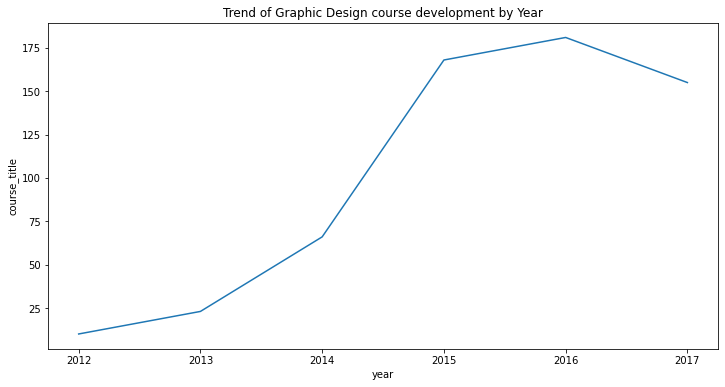

In [43]:
gdDf = df[df['subject'] == "Graphic Design"]
groupedgdDf = gdDf.groupby(by='year').count().reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=groupedgdDf, x='year', y='course_title')
plt.title('Trend of Graphic Design course development by Year')

Trend of Graphic Design Course Subscribers

Text(0.5, 1.0, 'Trend of Graphic Design course Subscribers by Year')

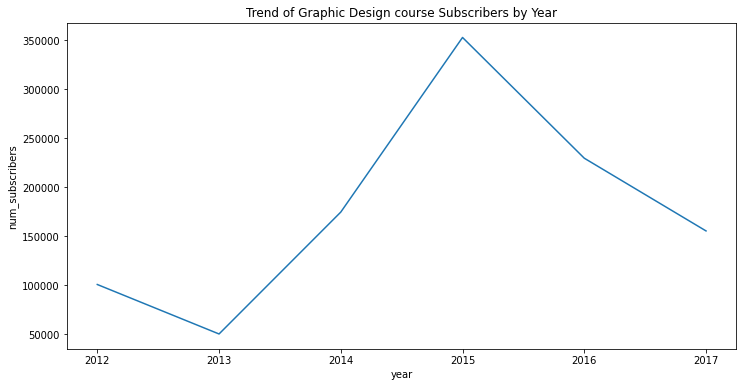

In [44]:
groupedgdDfSub = gdDf.groupby(by='year').sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=groupedgdDfSub, x='year', y='num_subscribers')
plt.title('Trend of Graphic Design course Subscribers by Year')

Trend of Graphic Design Course Earnings

Text(0.5, 1.0, 'Trend of Graphic Design course earnings by Year')

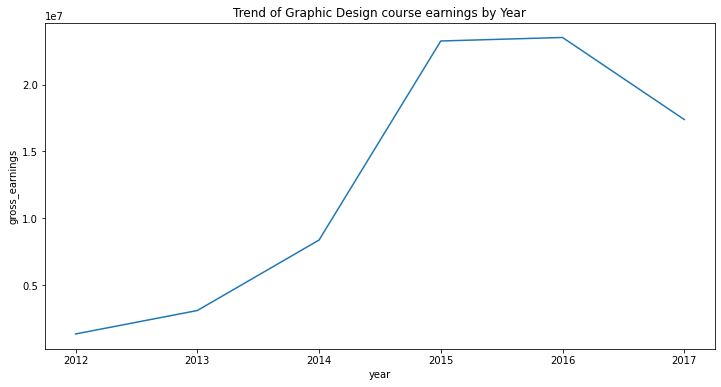

In [45]:
groupedgdDfearn = gdDf.groupby(by='year').sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=groupedgdDfearn, x='year', y='gross_earnings')
plt.title('Trend of Graphic Design course earnings by Year')

Analysis on Web Development Category

Top 5 Web Development Courses

In [46]:
df[(df['subject'] == "Web Development")].sort_values(by='num_subscribers', ascending=False)[:5]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
2827,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5,2013-02-14,Web Development,0,2,2013
3032,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5,2013-06-09,Web Development,0,6,2013
3230,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,2015-11-02,Web Development,24316800,11,2015
2783,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08,Web Development,0,4,2014
3232,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,2016-03-08,Web Development,22902400,3,2016


Top 3 Free Web Development Courses

In [47]:
df[(df['subject'] == "Web Development") & (df['is_paid'] == False)].sort_values(by='num_subscribers', ascending=False)[:3]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
2827,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5,2013-02-14,Web Development,0,2,2013
3032,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5,2013-06-09,Web Development,0,6,2013
2783,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08,Web Development,0,4,2014


Top 3 Paid Web Development Courses

In [48]:
df[(df['subject'] == "Web Development") & (df['is_paid'] == True)].sort_values(by='num_subscribers', ascending=False)[:3]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
3230,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,2015-11-02,Web Development,24316800,11,2015
3232,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,2016-03-08,Web Development,22902400,3,2016
2619,Learn Javascript & JQuery From Scratch,True,30,84897,2685,10,All Levels,2.0,2013-10-10,Web Development,2546910,10,2013


Most Reviewed Web Development Courses

In [49]:
df[(df['subject'] == "Web Development")].sort_values(by='num_reviews', ascending=False)[:3]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
3230,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,2015-11-02,Web Development,24316800,11,2015
3232,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,2016-03-08,Web Development,22902400,3,2016
3204,Angular 4 (formerly Angular 2) - The Complete ...,True,190,73783,19649,329,All Levels,22.0,2016-02-11,Web Development,14018770,2,2016


Costliest Web Development Courses

In [50]:
df[(df['subject'] == "Web Development")].sort_values(by='price', ascending=False)[:3]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
3533,"Kids Coding -Introduction to HTML, CSS and Jav...",True,200,2355,143,215,Beginner Level,7.0,2012-11-26,Web Development,471000,11,2012
3620,Learning Path: The Road to Elasticsearch,True,200,50,5,60,Beginner Level,5.0,2017-05-29,Web Development,10000,5,2017
3489,Ultimate guide to Social Media Web development...,True,200,11011,13,36,All Levels,2.5,2015-09-20,Web Development,2202200,9,2015


Longest Web Development Courses

In [51]:
df[(df['subject'] == "Web Development")].sort_values(by='content_duration', ascending=False)[:3]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
3141,The Complete Web Development Course - Build 1...,True,200,7501,1213,384,All Levels,76.5,2015-11-09,Web Development,1500200,11,2015
3611,Modern E-Commerce Store In php & mysqli With B...,True,50,240,45,358,All Levels,66.5,2016-12-09,Web Development,12000,12,2016
2613,Become a Professional Web Developer | Version 3.0,True,200,6851,276,454,All Levels,60.0,2014-01-21,Web Development,1370200,1,2014


Trend of Web Development Course Development

Text(0.5, 1.0, 'Trend of Web Development course development by Year')

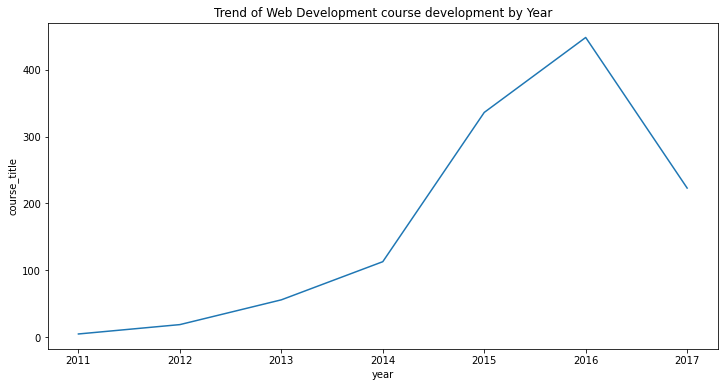

In [52]:
webDf = df[df['subject'] == "Web Development"]
groupedWebDf = webDf.groupby(by='year').count().reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=groupedWebDf, x='year', y='course_title')
plt.title('Trend of Web Development course development by Year')

Trend of Web Development Course Subscribers

Text(0.5, 1.0, 'Trend of Web Development course subscribers by Year')

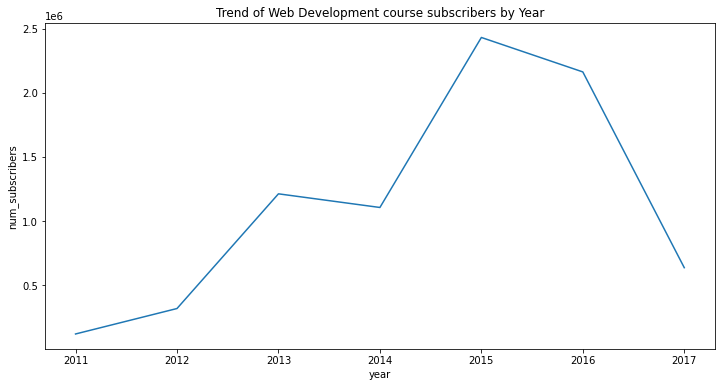

In [53]:
groupedWebDf2 = webDf.groupby(by='year').sum().reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=groupedWebDf2, x='year', y='num_subscribers')
plt.title('Trend of Web Development course subscribers by Year')

Trend of Web Development Course Earnings

Text(0.5, 1.0, 'Trend of Web Development course earnings by Year')

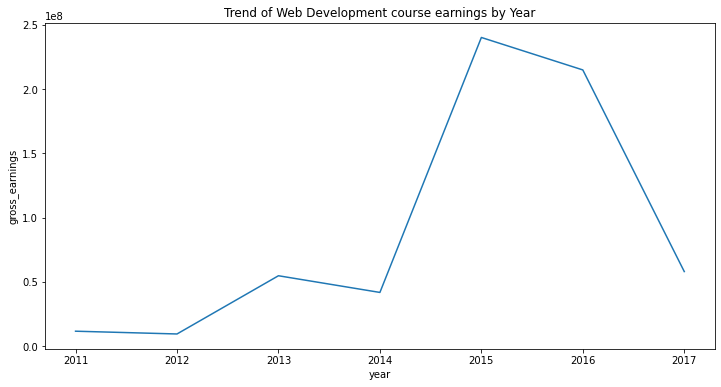

In [54]:
plt.figure(figsize=(12,6))
sns.lineplot(data=groupedWebDf2, x='year', y='gross_earnings')
plt.title('Trend of Web Development course earnings by Year')

BOX PLOTS

Text(0.5, 1.0, 'Box Plot on Subject And Price')

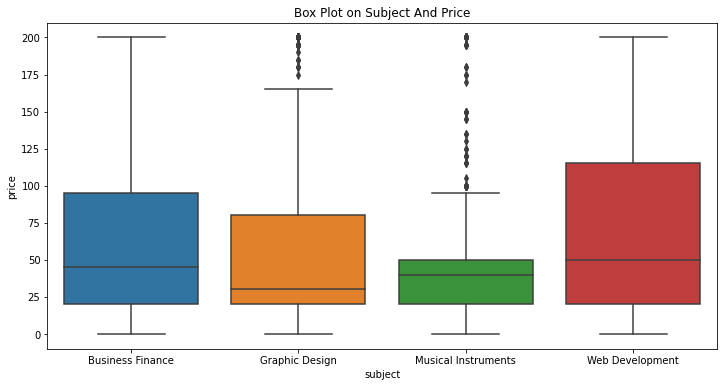

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='subject', y='price')
plt.title('Box Plot on Subject And Price')


Text(0.5, 1.0, 'Box Plot on Subject And Number of Subscribers')

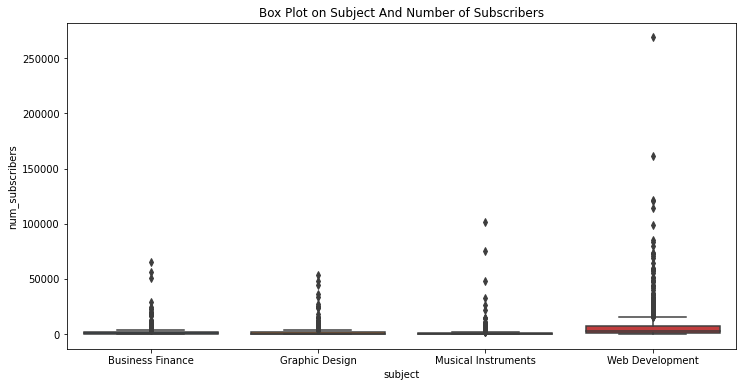

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='subject', y='num_subscribers')
plt.title('Box Plot on Subject And Number of Subscribers')


Text(0.5, 1.0, 'Box Plot on Subject And Gross Earnings')

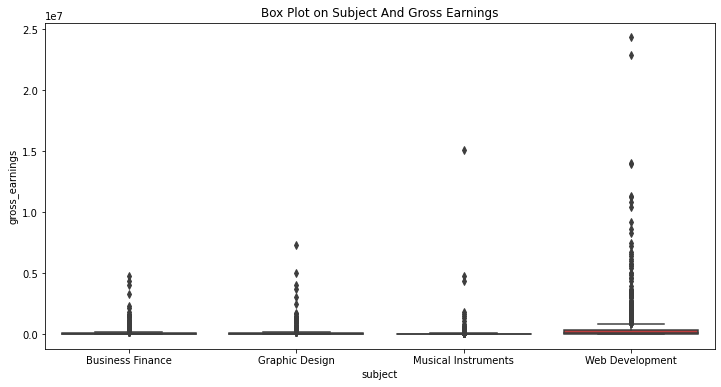

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='subject', y='gross_earnings')
plt.title('Box Plot on Subject And Gross Earnings')


Text(0.5, 1.0, 'Box Plot on Subject And Year')

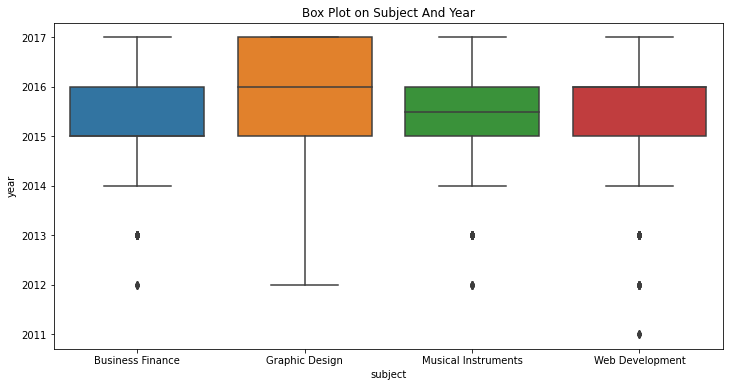

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='subject', y='year')
plt.title('Box Plot on Subject And Year')


Text(0.5, 1.0, 'Box Plot on Subject And Month')

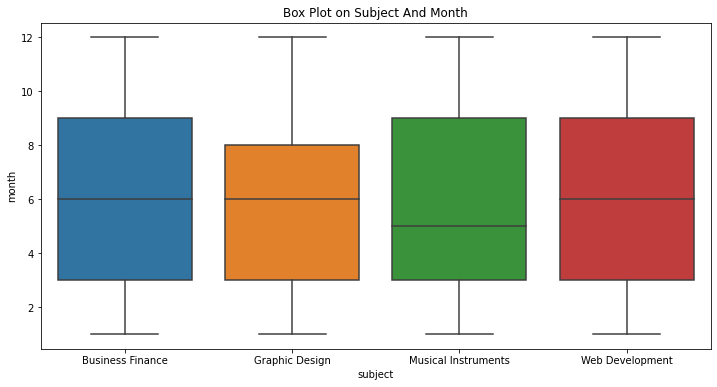

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='subject', y='month')
plt.title('Box Plot on Subject And Month')


Top Subscribed Courses On Udemy 

In [59]:
df.nlargest(5,'num_subscribers')

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,gross_earnings,month,year
2827,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5,2013-02-14,Web Development,0,2,2013
3032,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5,2013-06-09,Web Development,0,6,2013
3230,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,2015-11-02,Web Development,24316800,11,2015
2783,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08,Web Development,0,4,2014
3232,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,2016-03-08,Web Development,22902400,3,2016


<h1>Prediction Of Course Prices</h1>

In [179]:
X = df[["num_subscribers","num_reviews","num_lectures","content_duration", "month", "year", "gross_earnings"]]
y = df['is_paid']

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)


In [181]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

In [182]:
print("Intercept:", lm.intercept_)


Intercept: [1.5451678e-05]


In [183]:
predictions = lm.predict(X_test)
predictions

array([ True,  True,  True, ...,  True,  True, False])

C:\Users\1992729\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_paid'>

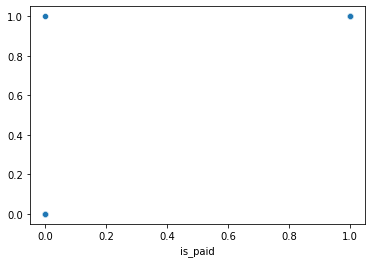

In [184]:
sns.scatterplot(y_test, predictions)

In [185]:
from sklearn import metrics
"""import numpy as np
print("MAE: ", metrics.mean_absolute_error(y_test,predictions))
print("MSE: ", metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) """
print("score: ", round(lm.score(X_test,y_test),3))
print(metrics.classification_report(y_test,predictions))

score:  0.999
              precision    recall  f1-score   support

       False       1.00      0.99      0.99        96
        True       1.00      1.00      1.00      1008

    accuracy                           1.00      1104
   macro avg       1.00      0.99      1.00      1104
weighted avg       1.00      1.00      1.00      1104



In [187]:
#sns.distplot((y_test-predictions), bins=30)

Key Findings/Insights from the dataset

<ul>
<li>As of 2017, Udemy comprises of <strong>3678 </strong>courses across different subjects/categories.</li>
<li>Average course subscription across the platform is <strong>3197</strong>, with content duration average of <strong>4 hours</strong>.&nbsp;</li>
<li>The most subscribed course on Udemy has around 268923 subscriptions.</li>
<li>Out of the average 3197 course subscriptions, only 156 people leave review on the courses they take.</li>
<li>On average each udemy course consists of <strong>40 lectures</strong>, and the maximum lectures a course has is 779.</li>
<li>The longest course on the platform is <strong>78.5 hours </strong>long.</li>
<li><em>91%</em> content hosted on the platform is in the form of paid courses, and only <em>9% </em>content is free.</li>
<li>Course development for udemy began in 2011, and peaked in early 2016. Since then the addition of new courses on the platform has been lower.</li>
<li>The trend of free course development fell less than the trend of paid course development. This shows that there are other competitors that are providing better features and services to course developers, and hence they are turning faces away from udemy.&nbsp;</li>
<li>Out of all the courses on the platform, most courses are marked with All levels difficulty level and 1929 courses belong to this category. Expert level courses are very low, and udemy needs to add more expert level courses to the catalogue to attract experienced learners to the platform.</li>
<li>On the subjects front, web development emerges as a category leader with <em>32.63% </em>courses on the platform tagged to this category. Up next is business finance with <em>32.49%</em>, followed by Musical Instruments at <em>18.49%</em> and graphic design at <em>16.39%.</em></li>
<li>Around 1206 courses were added to the platform in 2016, which is the highest. On the other hand, only 5 courses were added in 2011.&nbsp;</li>
<li>Most courses are published in May and June. While least courses are developed in September.</li>
<li><em>Bitcoin or How I learned to stop worrying and start investing </em>is the best business finance course on the platform based on subscriber count. The course is 8 hours long, and subscribed by 65576 people.</li>
<li><em>Financial Management: A complete study</em> is the longest business finance course with 71.5 hours of content.&nbsp;</li>
<li>&nbsp;Published in 2017 and priced at $200,<em> Python Algo Trading: FX Trading with Oanda </em>is the costliest business finance course.</li>
<li><em>Accounting in 60 Minutes - A Brief Introduction</em>, is the best beginner level business finance course that is subscribed by 56659 users.</li>
<li>The number of business finance course subscribers has fallen sharply since the start of 2016 from <em>426647</em> to <em>130299 </em>in 2017.</li>
<li>Earnings for business finance courses decreased by 64% between 2016 and 2017.</li>
<li><em>Photoshop In-Depth: Master all of Photoshop</em>, is the most subscribed graphic design course with a subscriber count of <em>53851</em>.</li>
<li>With content duration of <em>78.5 hours</em>, <em>The Complete Figure Drawing Course HD</em>, is the longest course in graphic design category.</li>
<li>Graphic design course demand peaked in 2015, and since then it is declining constantly.</li>
<li><em>Learn HTML5 Programming From Scratch</em>, is the most subscribed web development course on the platform with <em>268923 </em>subscribers.&nbsp;</li>
<li>The Complete Web Development Course is the costliest and longest course in web&nbsp; development category. It is 76.5 hours long, and priced at $200.</li>
<li>Demand for web development courses peaked in 2015, and since then it has dropped by <em>70%</em> in 2017.</li>

</ul>